In [14]:
import pandas as pd
import re
import numpy as np

In [2]:

df = pd.read_excel('/Users/thor/Documents/EC_utbildning/R/regression_analysis_R/data_raw/Skrapning_v3_ForetagNoleasing.xlsx')

In [3]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'link', 'Company',
       'Location', 'Year', 'Fuel', 'Miles', 'Gear', 'Price', 'Date', 'Href',
       'Href-href', 'Name'],
      dtype='object')

In [4]:
df = df[['Company','Location', 'Year', 'Fuel', 'Miles', 'Gear', 'Price', 'Name']]

In [5]:
df

,Company,Location,Year,Fuel,Miles,Gear,Price,Name
0,Företag,Stockholm,2021,Bensin,3 089 mil,Manuell,186 900 kr,Seat León Sportstourer 1.5 TSI 130 HK STYLE
1,Företag,Stockholm,2021,Miljöbränsle/Hybrid,8 057 mil,Automat,329 900 kr,Volvo V60 Recharge T6 Inscription Expression (...
2,Företag,Stockholm,2023,El,2 045 mil,Automat,419 900 kr,Volvo C40 Recharge Single Motor Core (SELEKT)
3,NaN,Östergötland,2018,Bensin,14 854 mil,Automat,189 900 kr,Mitsubishi Outlander 2.0 4WD 7-sits V-Däck ing...
4,NaN,Örebro,2008,Bensin,30 998 mil,Manuell,39 900 kr,"Volvo V70 2.4 Classic, Momentum Euro 4"
...,...,...,...,...,...,...,...,...
12489,NaN,Stockholm,1988,Bensin,7 500 mil,Automat,69 900 kr,Volvo 340 3DR 1.4 VARIOMATIC TOPPSKICK LÅGMIL
12490,NaN,Uppsala,2021,El,147 mil,Automat,349 000 kr,Opel MOVANO e L3H2 70kWh AUT Business NAV Enda...
12491,NaN,Skåne,2011,Miljöbränsle/Hybrid,15 900 mil,Automat,109 900 kr,Toyota Auris Hybrid e-CVT 136hk
12492,NaN,Örebro,2010,Bensin,17 832 mil,Manuell,32 900 kr,Nissan Micra 5-dörrar 1.2 Euro 4


In [6]:
def clean_miles_price(df):
    # Remove the ' mil' and ' kr' substrings, and replace spaces
    df['Miles'] = df['Miles'].str.replace(' mil', '').str.replace(' ', '')
    df['Price'] = df['Price'].str.replace(' kr', '').str.replace(' ', '')

    df['Miles'] = pd.to_numeric(df['Miles'], errors='coerce')
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df.dropna(subset=['Miles', 'Price'], inplace=True)
    
    df['Miles'] = df['Miles'].astype(int)
    df['Price'] = df['Price'].astype(int)
    
    return df

print(df.shape)
df = clean_miles_price(df)
print(df.shape)

(12494, 8)
(11598, 8)


In [7]:
df

,Company,Location,Year,Fuel,Miles,Gear,Price,Name
0,Företag,Stockholm,2021,Bensin,3089,Manuell,186900,Seat León Sportstourer 1.5 TSI 130 HK STYLE
1,Företag,Stockholm,2021,Miljöbränsle/Hybrid,8057,Automat,329900,Volvo V60 Recharge T6 Inscription Expression (...
2,Företag,Stockholm,2023,El,2045,Automat,419900,Volvo C40 Recharge Single Motor Core (SELEKT)
3,NaN,Östergötland,2018,Bensin,14854,Automat,189900,Mitsubishi Outlander 2.0 4WD 7-sits V-Däck ing...
4,NaN,Örebro,2008,Bensin,30998,Manuell,39900,"Volvo V70 2.4 Classic, Momentum Euro 4"
...,...,...,...,...,...,...,...,...
12489,NaN,Stockholm,1988,Bensin,7500,Automat,69900,Volvo 340 3DR 1.4 VARIOMATIC TOPPSKICK LÅGMIL
12490,NaN,Uppsala,2021,El,147,Automat,349000,Opel MOVANO e L3H2 70kWh AUT Business NAV Enda...
12491,NaN,Skåne,2011,Miljöbränsle/Hybrid,15900,Automat,109900,Toyota Auris Hybrid e-CVT 136hk
12492,NaN,Örebro,2010,Bensin,17832,Manuell,32900,Nissan Micra 5-dörrar 1.2 Euro 4


In [15]:
# Define the function that extracts information from a single vehicle description
def extract_vehicle_info(description):
    # Regex patterns
    brand_model_pattern = r'^(\w+[\-\w]*\b) (\w+[\-\w]*\b(?: \w+[\-\w]*\b)?)'
    engine_volume_pattern = r'(\d+\.\d+|\d+)[\s\-](TSI|TDI|D[\-\s]4D|AWD|DIG-T/MHEV|e)'
    horsepower_pattern = r'(\d+)\s?(HK|hp|hk)'
    
    # Extract brand and model
    brand_model_match = re.search(brand_model_pattern, description)
    brand = brand_model_match.group(1) if brand_model_match else np.nan
    model = brand_model_match.group(2) if brand_model_match else np.nan
    
    # Extract engine volume
    engine_volume_match = re.search(engine_volume_pattern, description)
    engine_volume = engine_volume_match.group(1) if engine_volume_match else np.nan
    
    # Extract horsepower
    horsepower_match = re.search(horsepower_pattern, description)
    horsepower = horsepower_match.group(1) if horsepower_match else np.nan
    
    return brand, model, engine_volume, horsepower

# Apply the function to the 'Description' column and expand the results into new columns
df[['Brand', 'Model', 'Engine Volume', 'Horsepower']] = df.apply(lambda row: pd.Series(extract_vehicle_info(row['Name'])), axis=1)


/var/folders/l6/_mq5j9z968v8v8r5l_th36vr0000gn/T/ipykernel_7874/349385283.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Brand', 'Model', 'Engine Volume', 'Horsepower']] = df.apply(lambda row: pd.Series(extract_vehicle_info(row['Name'])), axis=1)


In [21]:
df[['Engine Volume','Horsepower']] = df[['Engine Volume','Horsepower']].astype('float16')

In [17]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(11525, 12)
(11525, 12)


In [22]:
df.describe(include='all')

/Users/thor/anaconda3/envs/ds24/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/thor/anaconda3/envs/ds24/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/thor/anaconda3/envs/ds24/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,Company,Location,Year,Fuel,Miles,Gear,Price,Name,Brand,Model,Engine Volume,Horsepower
count,115,11525,11525.000000,11525,11525.000000,11513,1.152500e+04,11525,11507,11507,2355.000000,5109.0
unique,1,23,NaN,4,NaN,2,NaN,11142,65,2642,NaN,NaN
top,Företag,Stockholm,NaN,Diesel,NaN,Automat,NaN,Volvo XC40 T2 FWD Momentum,Volkswagen,Model 3,NaN,NaN
freq,115,3531,NaN,4551,NaN,8732,NaN,15,1531,115,NaN,NaN
mean,NaN,NaN,2017.471236,NaN,9557.910803,NaN,2.746411e+05,NaN,NaN,NaN,14.695312,inf
std,NaN,NaN,5.606110,NaN,6684.797163,NaN,2.260878e+05,NaN,NaN,NaN,inf,inf
min,NaN,NaN,1930.000000,NaN,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000000,2.0
25%,NaN,NaN,2016.000000,NaN,4356.000000,NaN,1.499000e+05,NaN,NaN,NaN,1.599609,130.0
50%,NaN,NaN,2018.000000,NaN,8575.000000,NaN,2.298000e+05,NaN,NaN,NaN,2.000000,170.0
75%,NaN,NaN,2021.000000,NaN,13667.000000,NaN,3.390000e+05,NaN,NaN,NaN,4.000000,204.0


In [27]:
df.sort_values('Price')


,Company,Location,Year,Fuel,Miles,Gear,Price,Name,Brand,Model,Engine Volume,Horsepower
7455,NaN,Stockholm,2017,Diesel,10216,Manuell,1,Nissan NV 400,Nissan,NV 400,NaN,NaN
12389,NaN,Jönköping,1999,Bensin,12300,Automat,1,Jaguar XK R,Jaguar,XK R,NaN,NaN
6742,NaN,Stockholm,2017,Diesel,25523,Automat,1,Volkswagen Transporter T32 2.0 TDI Comfort Plu...,Volkswagen,Transporter T32,2.0,NaN
9373,NaN,Skåne,1972,Bensin,5560,Manuell,1,Alfa Romeo Montreal * OBS: 5560 MIL *,Alfa,Romeo Montreal,NaN,NaN
11507,NaN,Jönköping,2009,Bensin,8090,Automat,1,Jaguar XK R Portfolio,Jaguar,XK R,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7473,NaN,Skåne,2023,Bensin,1,Automat,3525590,Mercedes-Benz Maybach S680 Night Series,Mercedes-Benz,Maybach S680,NaN,NaN
7886,NaN,Skaraborg,2018,Bensin,800,Automat,3795000,"Porsche 911 Techart GT Street R 720HK , FULLT...",Porsche,911,NaN,720.0
5311,NaN,Kronoberg,2016,Bensin,2,Manuell,3995000,Porsche 911 R Sport Chrono 500hk (Endast 20km),Porsche,911 R,NaN,500.0
11778,NaN,Skåne,2019,Bensin,604,Automat,3995812,Ferrari 812 Superfast,Ferrari,812 Superfast,NaN,NaN


<Axes: >

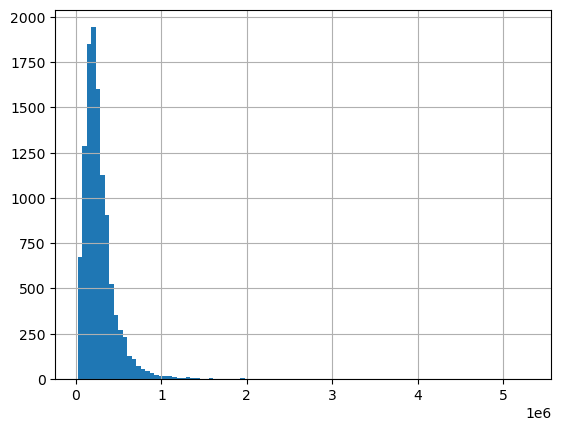

In [30]:
df[df['Price'] > 20000]['Price'].dropna().hist(bins=100)

In [31]:
df['Location'].unique()

array(['Stockholm', 'Östergötland', 'Örebro', 'Halland', 'Skåne',
       'Västerbotten', 'Kronoberg', 'Göteborg', 'Västmanland', 'Dalarna',
       'Gävleborg', 'Älvsborg', 'Skaraborg', 'Jönköping',
       'Västernorrland', 'Gotland', 'Blekinge', 'Värmland', 'Norrbotten',
       'Södermanland', 'Uppsala', 'Kalmar', 'Jämtland'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11525 entries, 0 to 12493
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        115 non-null    object 
 1   Location       11525 non-null  object 
 2   Year           11525 non-null  int64  
 3   Fuel           11525 non-null  object 
 4   Miles          11525 non-null  int64  
 5   Gear           11513 non-null  object 
 6   Price          11525 non-null  int64  
 7   Name           11525 non-null  object 
 8   Brand          11507 non-null  object 
 9   Model          11507 non-null  object 
 10  Engine Volume  2355 non-null   float16
 11  Horsepower     5109 non-null   float16
dtypes: float16(2), int64(3), object(7)
memory usage: 1.0+ MB


In [24]:
df.to_csv('/Users/thor/Documents/EC_utbildning/R/regression_analysis_R/data_preprocessed/skrapning_v3_cleaned.csv')